# Argo Vertical Spectra

This notebook is based on Dhruv's vertical_spectra notebook with glider data

In [165]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib

In [198]:
ds_660_grid = xr.open_dataset('ctd_660_vert_4m_binned_29_june_2021.nc')
ds_660_grid

<xarray.Dataset>
Dimensions:       (ctd_pressure: 250, dives: 1007)
Coordinates:
  * ctd_pressure  (ctd_pressure) float64 2.0 6.0 10.0 14.0 ... 990.0 994.0 998.0
  * dives         (dives) float64 1.0 1.5 2.0 2.5 ... 508.0 508.5 509.0 509.5
Data variables:
    sigma0        (ctd_pressure, dives) float64 ...
    SA            (ctd_pressure, dives) float64 ...
    CT            (ctd_pressure, dives) float64 ...
    time          (ctd_pressure, dives) datetime64[ns] ...
    latitude      (ctd_pressure, dives) float64 ...
    longitude     (ctd_pressure, dives) float64 ...
Attributes:
    units:          kg/m^3
    comment:        Calculated using GSW
    standard_name:  Potential Density Anomaly
    platform:       glider
    history:        [2021-07-26 18:06:26] (v2021.3) glidertools.cleaning.outl...
    outlier_lims:   [33.83323076 35.65218568]

In [207]:
def glider_ds_filt(ds_interp,first,last,num,variable='CT'):
    sigmas=np.logspace(first,last,num)
    temp=np.zeros((ds_interp.ctd_pressure.shape[0],ds_interp.dives.shape[0],num))

    for n in range(0,num):
        temp[:,:,n]=filter.gaussian_filter1d(ds_interp[variable],sigma=sigmas[n],mode='nearest')

    ds_filt=xr.DataArray(temp,dims=['ctd_pressure','dives','filt_scale'],
        coords={'ctd_pressure':ds_interp.ctd_pressure,'dives':ds_interp.dives,'filt_scale':sigmas})
    return ds_filt
def glider_var(ds_interp,ds_filt,variable='TEMP'):
    var=np.zeros(len(ds_filt.filt_scale))
    for n,sig in enumerate(ds_filt.filt_scale):
        prof_filt=ds_filt.sel(filt_scale=sig)
        var[n]=(prof_filt-prof_interp).var()
    return var

In [209]:
ds_660_filt=glider_ds_filt(ds_660_grid,0.5,2.5,50)
ds_660_var=glider_var(ds_660_grid,ds_660_filt)

/home.ufs/amf2288/.conda/envs/argo/lib/python3.10/site-packages/xarray/core/nputils.py:155: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home.ufs/amf2288/.conda/envs/argo/lib/python3.10/site-packages/xarray/core/nputils.py:155: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home.ufs/amf2288/.conda/envs/argo/lib/python3.10/site-packages/xarray/core/nputils.py:155: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/home.ufs/amf2288/.conda/envs/argo/lib/python3.10/site-packages/xarray/core/nputils.py:155: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


(3.1622776601683795e-05, 3.1622776601683795)

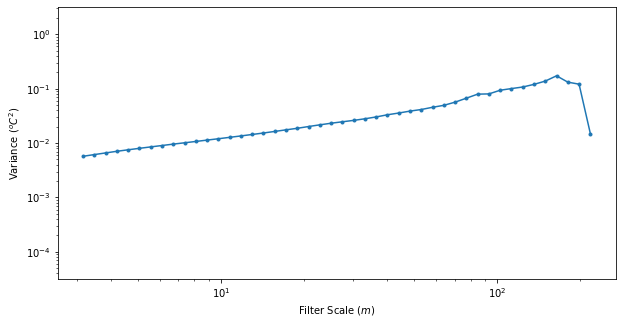

In [210]:
plt.figure(figsize=(10,5))
plt.plot(ds_660_filt.filt_scale,ds_660_var,'.-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Filter Scale ($m$)")
plt.ylabel("Variance ($^oC^2$)")
plt.ylim(10**-4.5,10**0.5)

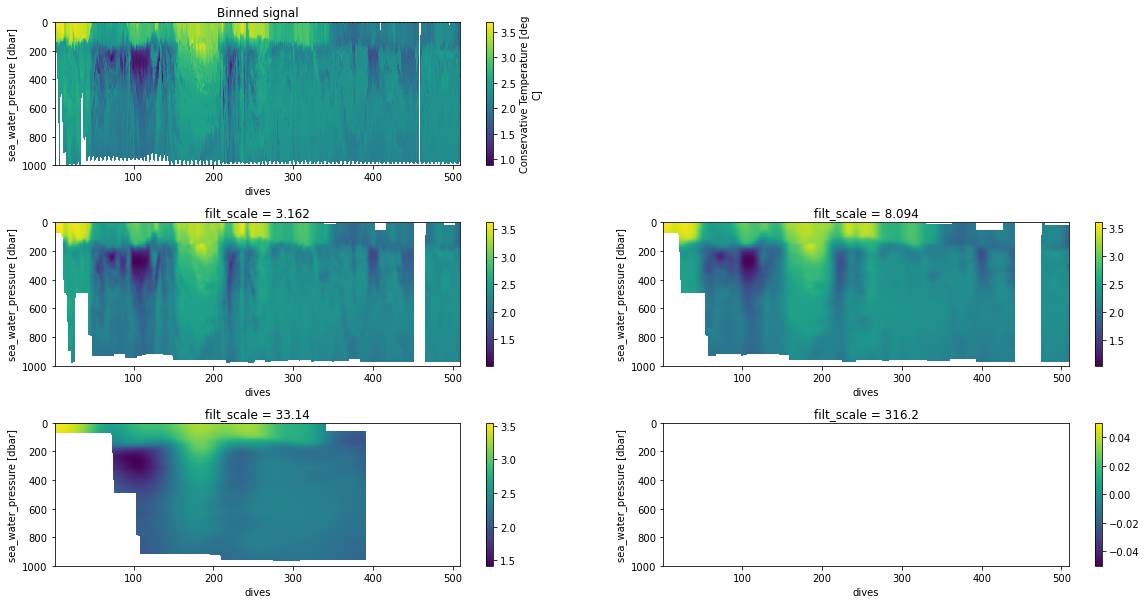

In [211]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
ds_660_grid.CT.plot(x='dives',y='ctd_pressure')
plt.gca().invert_yaxis()
plt.title('Binned signal')

plt.subplot(3,2,3)
ds_660_filt.isel(filt_scale=0).plot()
plt.gca().invert_yaxis()

plt.subplot(3,2,4)
ds_660_filt.isel(filt_scale=10).plot()
plt.gca().invert_yaxis()

plt.subplot(3,2,5)
ds_660_filt.isel(filt_scale=25).plot()
plt.gca().invert_yaxis()

plt.subplot(3,2,6)
ds_660_filt.isel(filt_scale=49).plot()
plt.gca().invert_yaxis()

plt.subplots_adjust(hspace=0.4,wspace=0.2)

In [433]:
select=ds_660_grid.sel({'ctd_pressure':[50:900],'dives':[50:450]})

SyntaxError: invalid syntax (1739015250.py, line 1)

In [ ]:
ds_660_grid.sel(dives=510)

In [437]:
selected=ds_660_grid.sel(dives=np.arange(50,275,0.5),ctd_pressure=np.arange(198,800,4))
selected

<xarray.Dataset>
Dimensions:       (ctd_pressure: 151, dives: 450)
Coordinates:
  * ctd_pressure  (ctd_pressure) float64 198.0 202.0 206.0 ... 790.0 794.0 798.0
  * dives         (dives) float64 50.0 50.5 51.0 51.5 ... 273.5 274.0 274.5
Data variables:
    sigma0        (ctd_pressure, dives) float64 ...
    SA            (ctd_pressure, dives) float64 ...
    CT            (ctd_pressure, dives) float64 1.805 1.793 1.808 ... 2.34 2.221
    time          (ctd_pressure, dives) datetime64[ns] ...
    latitude      (ctd_pressure, dives) float64 ...
    longitude     (ctd_pressure, dives) float64 ...
Attributes:
    units:          kg/m^3
    comment:        Calculated using GSW
    standard_name:  Potential Density Anomaly
    platform:       glider
    history:        [2021-07-26 18:06:26] (v2021.3) glidertools.cleaning.outl...
    outlier_lims:   [33.83323076 35.65218568]

In [438]:
selected_filt=glider_ds_filt(selected,0.5,2.5,50)
selected_var=glider_var(selected,selected_filt)

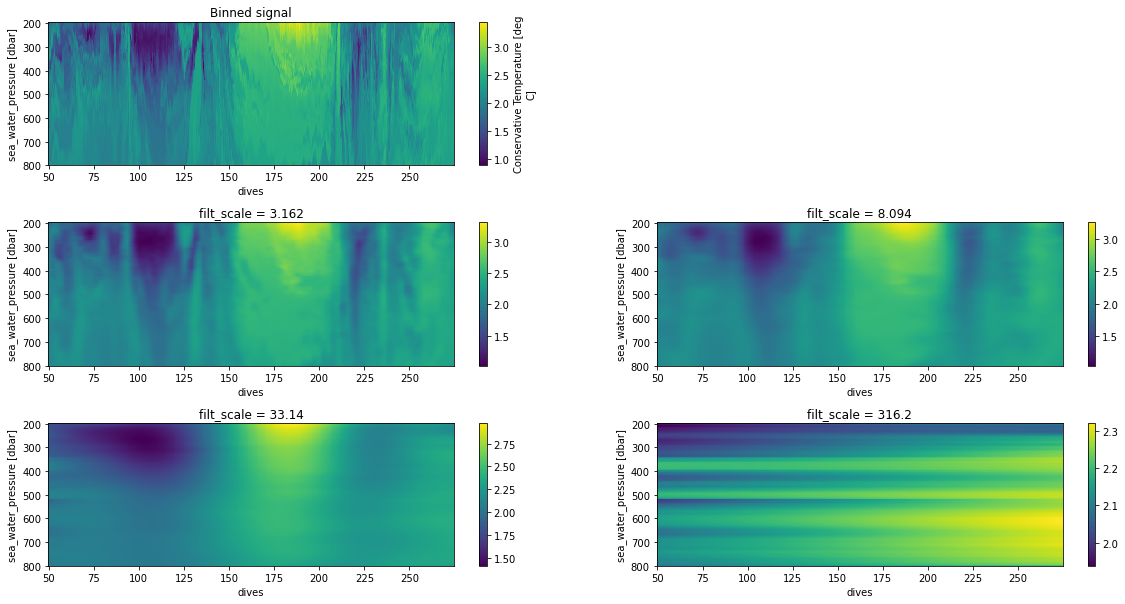

In [439]:
plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
selected.CT.plot(x='dives',y='ctd_pressure')
plt.gca().invert_yaxis()
plt.title('Binned signal')

plt.subplot(3,2,3)
selected_filt.isel(filt_scale=0).plot()
plt.gca().invert_yaxis()

plt.subplot(3,2,4)
selected_filt.isel(filt_scale=10).plot()
plt.gca().invert_yaxis()

plt.subplot(3,2,5)
selected_filt.isel(filt_scale=25).plot()
plt.gca().invert_yaxis()

plt.subplot(3,2,6)
selected_filt.isel(filt_scale=49).plot()
plt.gca().invert_yaxis()

plt.subplots_adjust(hspace=0.4,wspace=0.2)

(3.1622776601683795e-05, 3.1622776601683795)

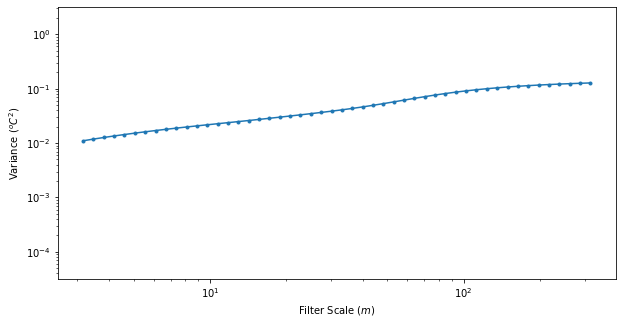

In [440]:
plt.figure(figsize=(10,5))
plt.plot(selected_filt.filt_scale,selected_var,'.-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Filter Scale ($m$)")
plt.ylabel("Variance ($^oC^2$)")
plt.ylim(10**-4.5,10**0.5)